<a href="https://colab.research.google.com/github/notKguin/MMK-Informservice/blob/main/final_project/project/ML_intensive_final_project_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Настройки

In [38]:
# pd.set_option('display.max_columns', None) # Убираем ограничение в количестве столбцов
pd.set_option('display.max_rows', None) # Убираем ограничение в количестве строк

In [39]:
# pd.reset_option('display.max_columns') # Сбрасываем ограничение по умолчанию в количестве столбцов
pd.reset_option('display.max_rows') # Сбрасываем ограничение по умолчанию в количестве строк

# Загрузка датасета

In [3]:
import pandas as pd
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/MMK_inforservice/datasets/ML-intensive_final_project_cleaned.csv', parse_dates=['Дата'])

In [6]:
df

Дата  Количество чугуна (т)  Удельный расход кокса (кг/т)  \
0    2012-09-02               4359.847                    457.062565   
1    2012-09-03               4425.385                    450.109336   
2    2012-09-04               4372.657                    464.184705   
3    2012-09-05               4447.549                    455.028522   
4    2012-09-06               4441.511                    467.232935   
...         ...                    ...                           ...   
1671 2017-09-26               5141.843                    404.566088   
1672 2017-09-27               5251.577                    401.616894   
1673 2017-09-28               5305.734                    401.454022   
1674 2017-09-29               5360.082                    402.017341   
1675 2017-09-30               5288.666                    407.751670   

      Расход холодного дутья (м³/ч)  Давление горячего дутья (ат)  \
0                       214677.1855                             4   
1                       214572.0651                             4   
2                       216907.2760                             4   
3                       217341.6706                             4   
4                       223169.5814                             4   
...                             ...                           ...   
1671                    264492.2077                             4   
1672                    268069.9850                             4   
1673                    267186.0690                             4   
1674                    266981.6263                             4   
1675                    269118.9583                             4   

      t горячего дутья (°С)  Расход природного газа (м³/ч)  \
0               1055.686386                    15916.95805   
1               1063.769384                    15998.28292   
2               1060.716365                    15984.38981   
3               1058.044291                    15975.46354   
4               1060.088181                    15999.31665   
...                     ...                            ...   
1671            1002.055957                    29951.71387   
1672            1002.480761                    29905.31812   
1673            1005.178185                    29838.85042   
1674            1002.133046                    29622.66935   
1675            1002.953089                    29912.03947   

      t природного газа (°С)  Содержание кислорода в дутье (%)  \
0                  14.137502                         26.303000   
1                  14.479280                         26.500450   
2                  14.486326                         26.511465   
3                  15.821851                         26.622388   
4                  18.935655                         26.354216   
...                      ...                               ...   
1671                4.641559                         28.243637   
1672                6.578101                         28.291484   
1673                5.593211                         28.148714   
1674                5.351993                         27.909949   
1675                4.774703                         27.716874   

      Расход пара на увлажнение (т/ч)  ...       Osn         P        Zn  \
0                            0.145088  ...  1.885476  0.027623  0.031147   
1                            0.131811  ...  1.870238  0.026238  0.030476   
2                            0.117763  ...  1.898096  0.026314  0.029333   
3                            0.128866  ...  1.900649  0.026509  0.030535   
4                            0.129629  ...  1.911628  0.024758  0.030446   
...                               ...  ...       ...       ...       ...   
1671                         0.274634  ...  1.822452  0.032123  0.040913   
1672                              NaN  ...  1.850458  0.032264  0.042306   
1673                              NaN  ...  1.808062  0.033479  0.041188   
1674               

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 95 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   Дата                                          1676 non-null   datetime64[ns]
 1   Количество чугуна (т)                         1676 non-null   float64       
 2   Удельный расход кокса (кг/т)                  1676 non-null   float64       
 3   Расход холодного дутья (м³/ч)                 1676 non-null   float64       
 4   Давление горячего дутья (ат)                  1676 non-null   int64         
 5   t горячего дутья (°С)                         1676 non-null   float64       
 6   Расход природного газа (м³/ч)                 1676 non-null   float64       
 7   t природного газа (°С)                        1676 non-null   float64       
 8   Содержание кислорода в дутье (%)              1499 non-null   float6

# Отбор признаков исходя из пропусков и корреляции


In [8]:
df = df.drop('Дата', axis=1) # Для нашей задачи он не нужен и в дальнейшем будет мешать

In [9]:
targets = ["Количество чугуна (т)", "Удельный расход кокса (кг/т)"]
corr_with_targets = df.corr()[targets].abs()

In [10]:
cols_to_drop = df.columns[
    (df.isnull().mean() > 0.25) &
    (corr_with_targets.min(axis=1) < 0.5)  # min() — корреляция < 0.5 с ОБЕИМИ целевыми переменными
]

In [11]:
df = df.drop(columns=cols_to_drop)

---
Удалено столбцов: 19  

---
Список:  
1. Вода на охлаждение. Водовод 1. Расход (м³/ч)
2. Вода на охлаждение. Водовод 2. Расход (м³/ч)  
3. Вода на охлаждение. Водовод 3. Расход (м³/ч)  
4. Чугун.Cr  
5. Чугун.Cu  
6. Чугун.Mn  
7. Чугун.Ni   
8. Чугун.S  
9. Чугун.V  
10. Шлак.Al₂O₃  
11. Шлак.CaO  
12. Шлак.FeO  
13. Шлак.Ko  
14. Шлак.MgO  
15. Шлак.MnO  
16. Шлак.NaO  
17. Шлак.S  
18. Шлак.SiO₂  
19. Шлак.TiO₂
---

# Графический анализ корреляции

## Таргет «Количество чугуна (т)»

### Общий анализ признаков

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
target_1 = 'Количество чугуна (т)'
corr_chugun = df.corr()[target_1].drop([target_1, 'Удельный расход кокса (кг/т)']).sort_values(ascending=False)
corr_chugun = corr_chugun[abs(corr_chugun) >= 0.5]

In [14]:
positive_corr_chugun = corr_chugun[corr_chugun > 0].sort_values(ascending=False)
negative_corr_chugun = corr_chugun[corr_chugun < 0].sort_values(ascending=True)

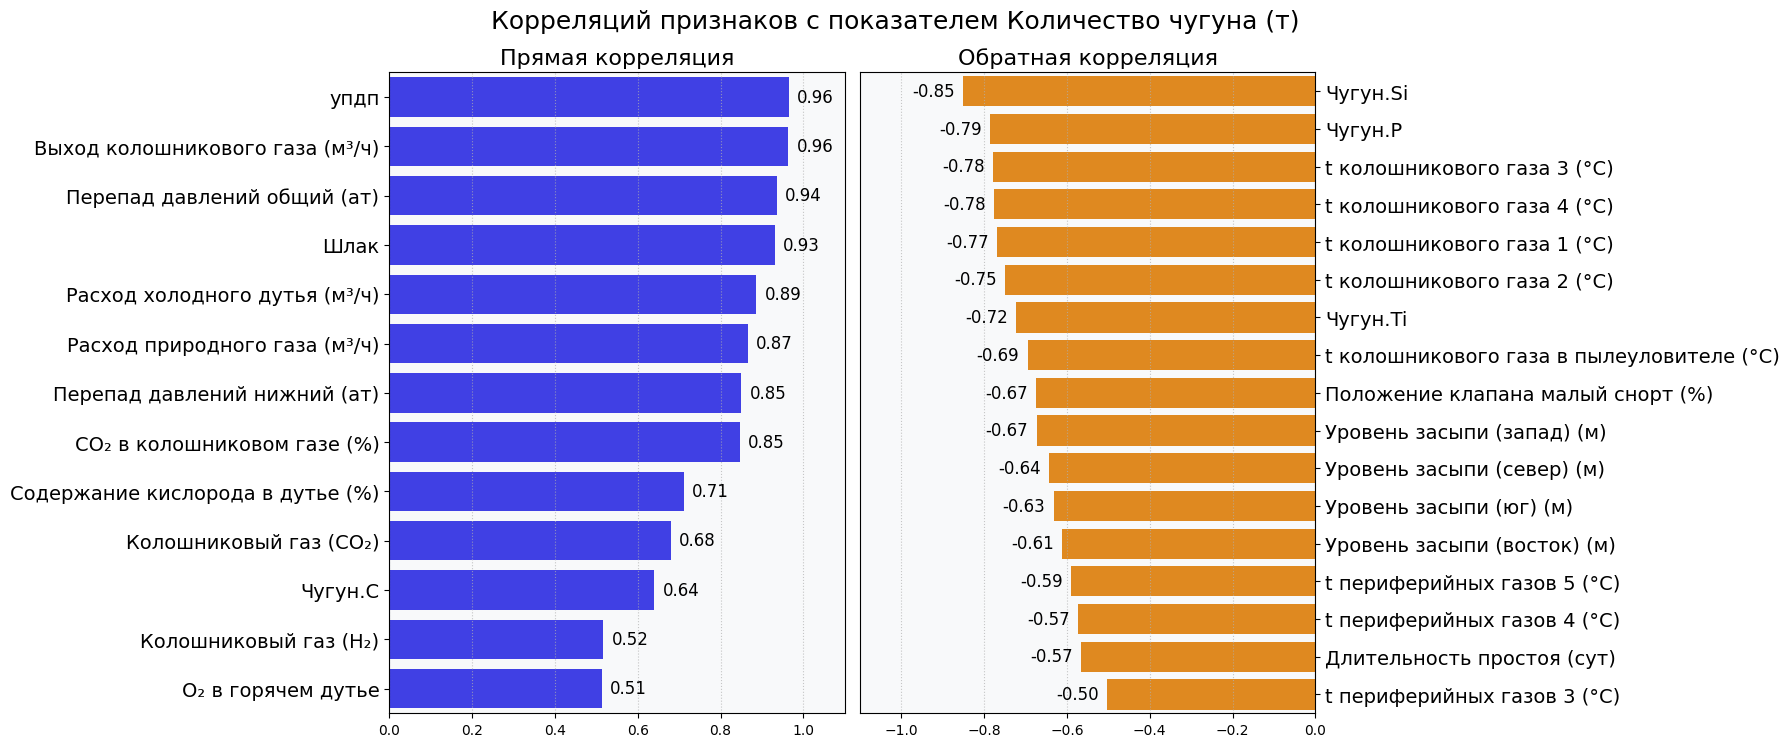

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)
fig.suptitle(f"Корреляций признаков с показателем {target_1}", fontsize=18)

# График ПРЯМОЙ корреляции
sns.barplot(x=positive_corr_chugun.values, y=positive_corr_chugun.index, palette=['#2525FF']*len(positive_corr_chugun), hue=positive_corr_chugun.index, legend=False, ax=ax1)
ax1.set_title("Прямая корреляция", fontsize=16)
ax1.set_xlim(0, 1.1)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel("")

for i, v in enumerate(positive_corr_chugun.values):
    ax1.text(v + 0.02, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=12)

# График ОБРАТНОЙ корреляции
sns.barplot(x=negative_corr_chugun.values, y=negative_corr_chugun.index, palette=['#FF8C00']*len(negative_corr_chugun), hue=negative_corr_chugun.index, legend=False, ax=ax2)
ax2.set_title("Обратная корреляция", fontsize=16)
ax2.set_xlim(-1.1, 0)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel("")

for i, v in enumerate(negative_corr_chugun.values):
    ax2.text(v - 0.02, i, f"{v:.2f}", color='black', ha='right', va='center', fontsize=12)

for ax in [ax1, ax2]:
    ax.grid(axis='x', linestyle=':', alpha=0.7)
    ax.set_facecolor('#f8f9fa')
    ax.set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

### Анализ каждого признака по отдельность

In [16]:
import numpy as np

In [17]:
top_features_chugun = corr_chugun.index
n_features_chugun = len(top_features_chugun)

In [18]:
n_cols_chugun = 3
n_rows_chugun = int(np.ceil(n_features_chugun / n_cols_chugun))

In [19]:
y_min_chugun = df['Количество чугуна (т)'].min() * 0.95
y_max_chugun = df['Количество чугуна (т)'].max() * 1.05

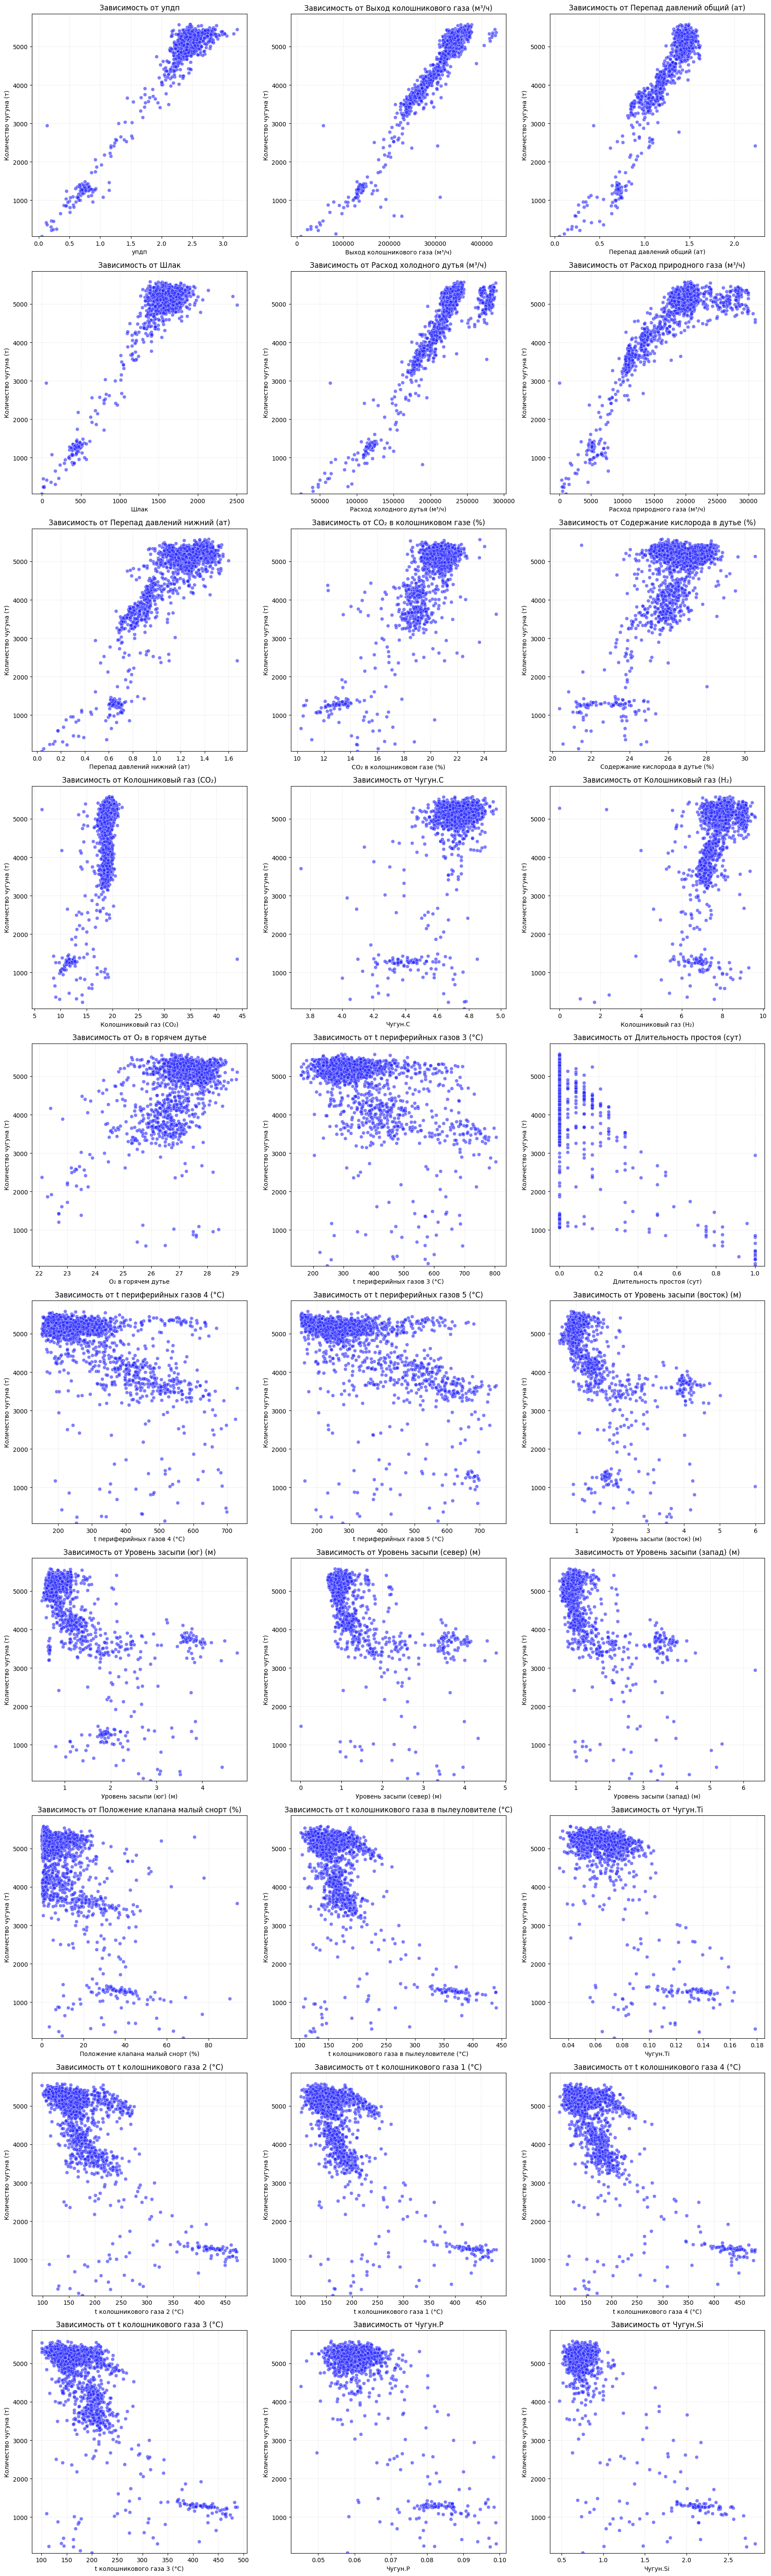

In [20]:
fig, axes = plt.subplots(n_rows_chugun, n_cols_chugun, figsize=(18, 6*n_rows_chugun))
fig.suptitle(None)

for i, feature in enumerate(top_features_chugun):
    ax = axes.flatten()[i] if n_features_chugun > 1 else axes

    sns.scatterplot(x=df[feature], y=df['Количество чугуна (т)'], color='#2525FF', alpha=0.6, ax=ax)

    # Здесь заглядываем в будущее, строя линию линейной регрессии
    # sns.regplot(x=df[feature], y=df['Количество чугуна (т)'], scatter=False, color='#FF0000', line_kws={'linewidth': 3}, ax=ax)

    ax.set_title(f"Зависимость от {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Количество чугуна (т)', fontsize=10)
    ax.set_ylim(y_min_chugun, y_max_chugun)

    ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

### Итог по анализу признаков

---

#### Кореляция >= 0.5

«упдп» (0.9648) - один из самых сильных факторов. Вероятно, отражает управляемую переменную загрузки/подачи, которая прямо связана с объёмом производимого чугуна. ***уточнить что он вообще значит
  
«Выход колошникового газа (м³/ч)» (0.9633) - чем больше газа отводится, тем активнее идут процессы в доменной печи, тем выше производство чугуна.
  
«Перепад давлений общий (ат)» (0.9355) - высокий перепад говорит о более интенсивной работе печи, что способствует увеличению выхода.
  
«Шлак» (0.9311) - побочный продукт, его рост также может сопровождать рост чугуна при стабильных условиях.
  
«Расход холодного дутья (м³/ч)» (0.8861) - подача воздуха поддерживает горение кокса. Больше дутья — выше температура и скорость реакции.
  
«Расход природного газа (м³/ч)» (0.8651) - дополнительное топливо улучшает тепловой баланс и способствует увеличению выхода.
  
«CO₂ в колошниковом газе (%)» (0.8471) - признак активного горения углерода — важный показатель производительности.
  
«Содержание кислорода в дутье (%)» (0.7116) - чем выше содержание O₂, тем эффективнее горение и восстановительные реакции.
  
«Чугун.C» (0.6404) - содержание углерода в чугуне косвенно отражает условия плавки и влияет на выход.
  
«O₂ в горячем дутье» (0.5133) - связан с качеством окисления и, как следствие, с эффективностью печи.
   
---

---

#### Кореляция <= -0.5
  
«t периферийных газов (3–5)» (≈ -0.50…-0.59) - Повышенные температуры на периферии могут говорить о неравномерности процессов или потерях тепла.
  
«Уровень засыпи (восток/юг/север/запад)» (≈ -0.61…-0.67) - Высокий уровень засыпи может указывать на недостаточную работу загрузочного устройства — меньше объёма в печи.
  
«Положение клапана малый снорт (%)» (-0.67) - Чем больше открыт клапан, тем больше потеря давления/газа — может снижать эффективность.
  
«t колошникового газа (1–4)» (≈ -0.75…-0.77) - Высокая температура вверху домны говорит о низкой теплопередаче вниз — признак снижения эффективности.
  
«Чугун.P / Чугун.Ti / Чугун.Si» (≈ -0.72…-0.85) - Увеличение нежелательных примесей может говорить о нестабильном процессе и снижении выхода качественного чугуна.
  
«Удельный расход кокса (кг/т)» (-0.83) - Чем больше расход кокса на тонну чугуна — тем менее эффективен процесс. Это важно: снижение этого показателя хорошо.

---

## Таргет «Удельный расход кокса (кг/т)»

### Общий анализ признаков

In [36]:
target_2 = 'Удельный расход кокса (кг/т)'
corr_coke = df.corr()[target_2].drop([target_2, 'Количество чугуна (т)']).sort_values(ascending=False)
#corr_coke = corr_coke[abs(corr_coke) >= 0.4]

In [37]:
corr_coke

Чугун.Si                           0.733862
Чугун.P                            0.701459
t колошникового газа 4 (°С)        0.694142
t колошникового газа 3 (°С)        0.688523
t колошникового газа 1 (°С)        0.683686
                                     ...   
Расход природного газа (м³/ч)     -0.762147
Выход колошникового газа (м³/ч)   -0.772286
Шлак                              -0.801134
упдп                              -0.817338
CO₂ в колошниковом газе (%)       -0.819429
Name: Удельный расход кокса (кг/т), Length: 73, dtype: float64

In [22]:
positive_corr_coke = corr_coke[corr_coke > 0].sort_values(ascending=False)
negative_corr_coke = corr_coke[corr_coke < 0].sort_values(ascending=True)

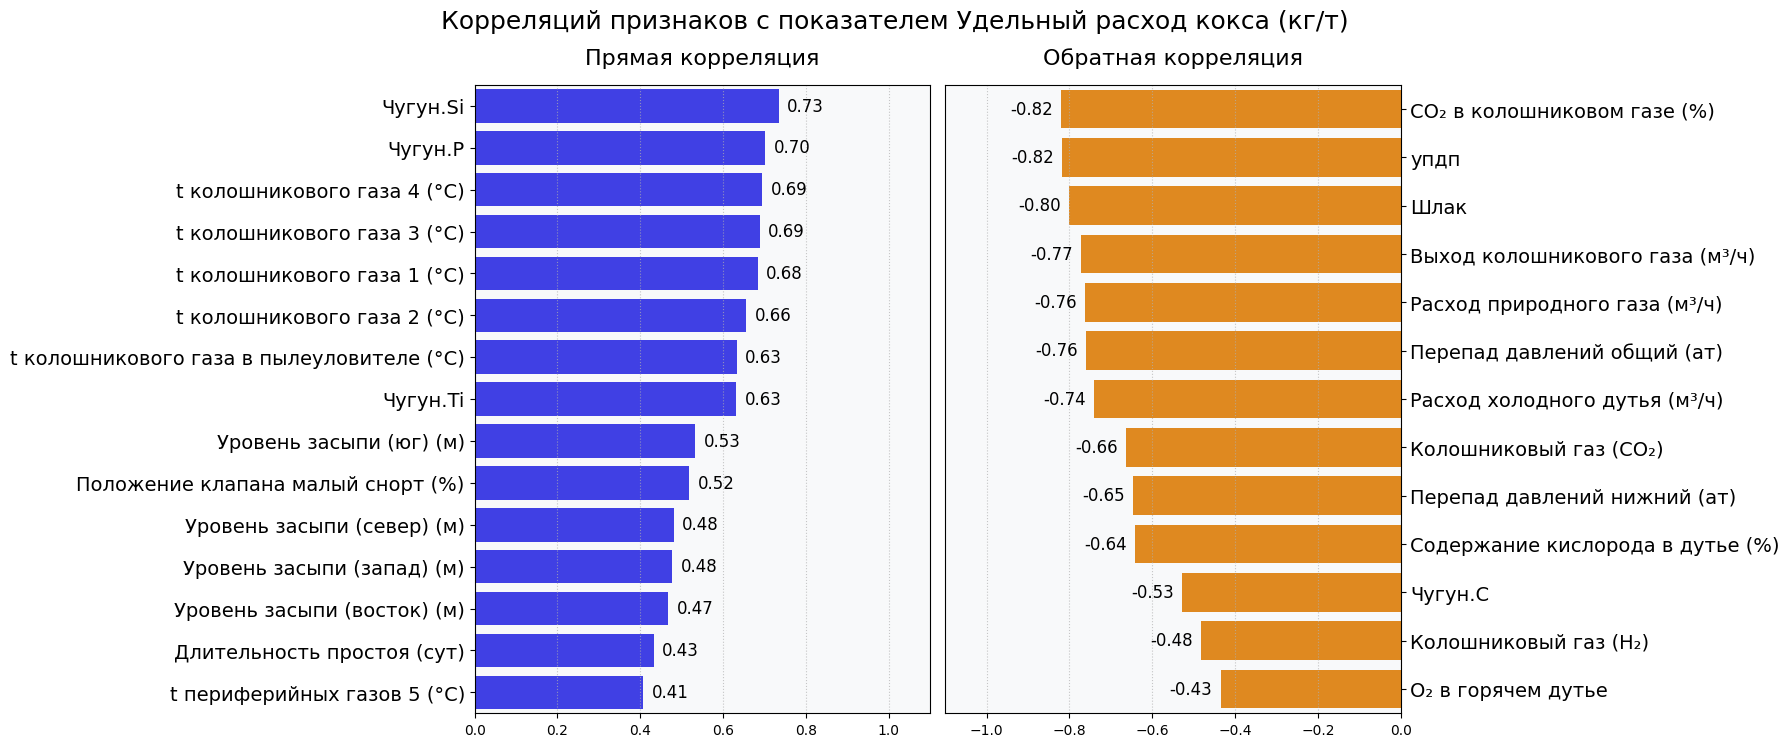

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8), sharey=False)
fig.suptitle(f"Корреляций признаков с показателем {target_2}", fontsize=18)

# График ПРЯМОЙ корреляции
sns.barplot(x=positive_corr_coke.values, y=positive_corr_coke.index, palette=['#2525FF']*len(positive_corr_coke), hue=positive_corr_coke.index, legend=False, ax=ax1)
ax1.set_title("Прямая корреляция", fontsize=16, pad=15)
ax1.set_xlim(0, 1.1)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_xlabel("")

for i, v in enumerate(positive_corr_coke.values):
    ax1.text(v + 0.02, i, f"{v:.2f}", color='black', ha='left', va='center', fontsize=12)

# График ОБРАТНОЙ корреляции
sns.barplot(x=negative_corr_coke.values, y=negative_corr_coke.index, palette=['#FF8C00']*len(negative_corr_coke), hue=negative_corr_coke.index, legend=False, ax=ax2)
ax2.set_title("Обратная корреляция", fontsize=16, pad=15)
ax2.set_xlim(-1.1, 0)
ax2.yaxis.tick_right()
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel("")

for i, v in enumerate(negative_corr_coke.values):
    ax2.text(v - 0.02, i, f"{v:.2f}", color='black', ha='right', va='center', fontsize=12)

for ax in [ax1, ax2]:
    ax.grid(axis='x', linestyle=':', alpha=0.7)
    ax.set_facecolor('#f8f9fa')
    ax.set_ylabel("")

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.show()

### Анализ каждого признака по отдельность

In [24]:
top_features_coke = corr_coke.index
n_features_coke = len(top_features_coke)

In [25]:
n_cols_coke = 3
n_rows_coke = int(np.ceil(n_features_coke / n_cols_coke))

In [26]:
y_min_coke = df['Удельный расход кокса (кг/т)'].min() * 0.95
y_max_coke = df['Удельный расход кокса (кг/т)'].max() * 1.05

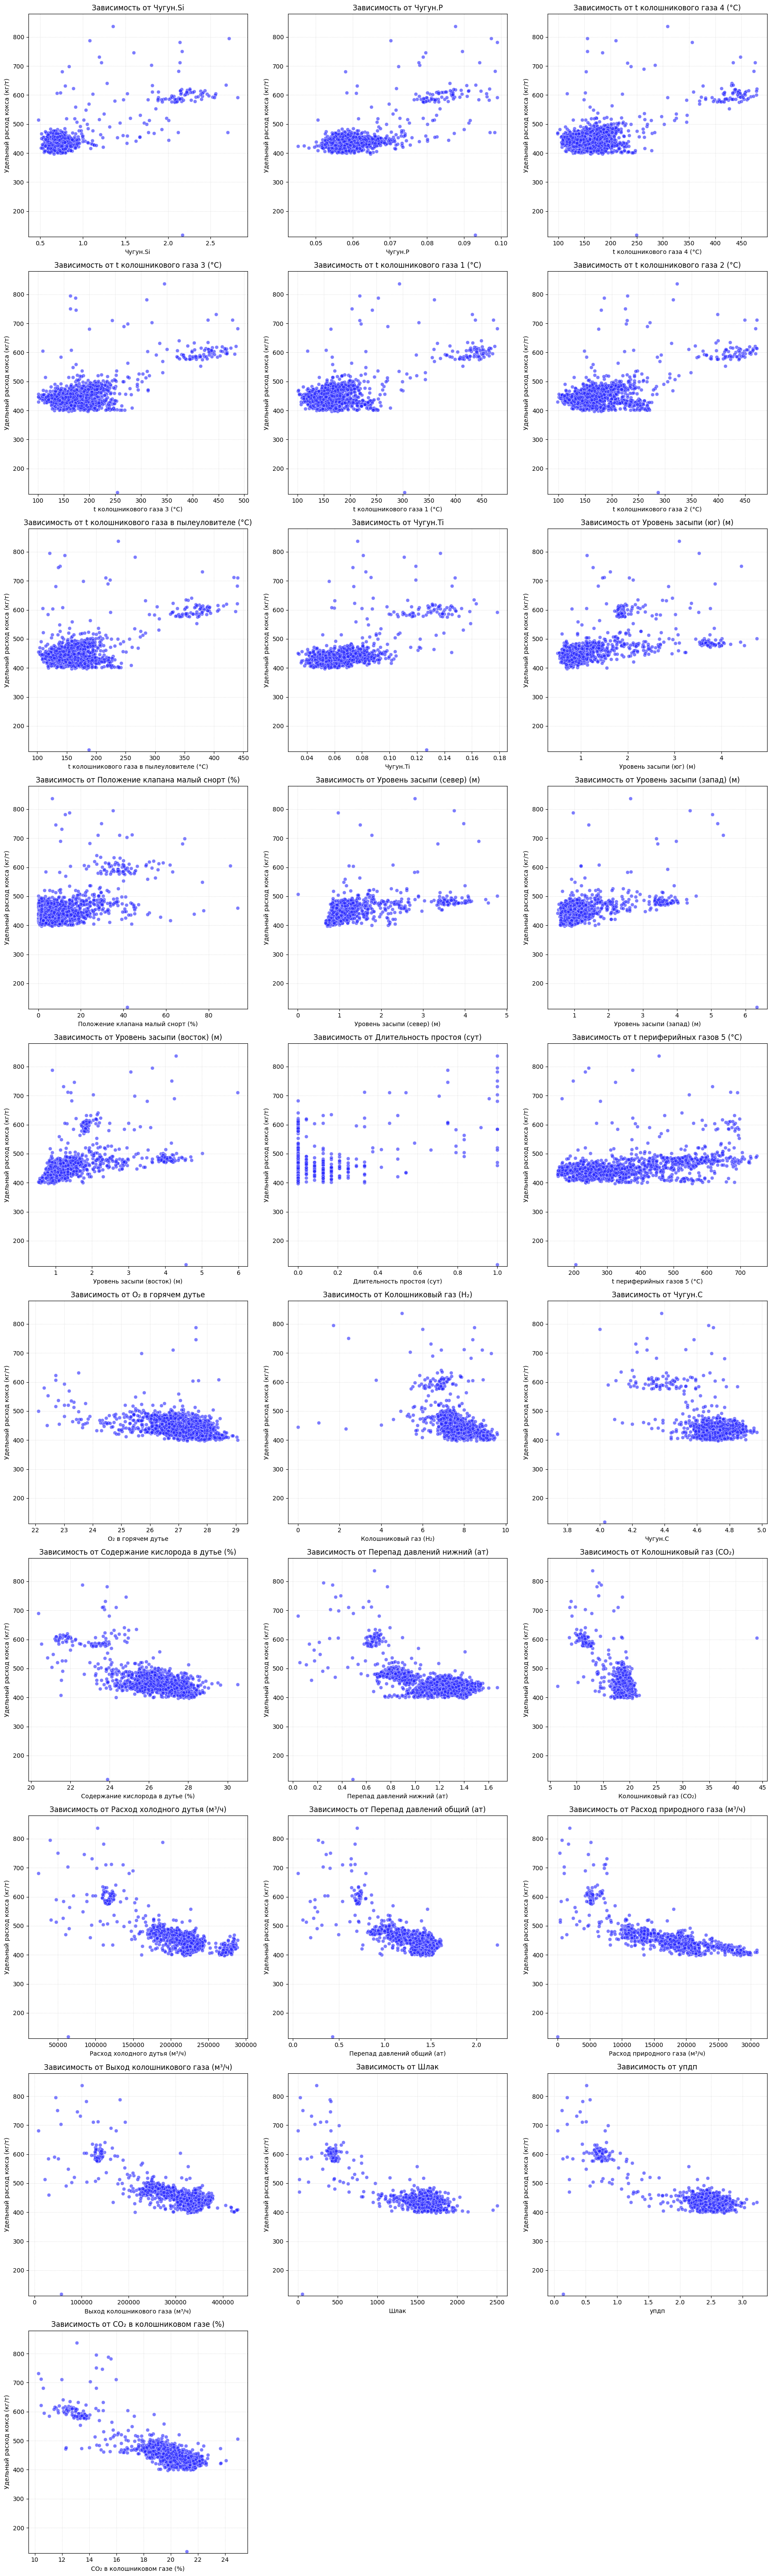

In [35]:
fig, axes = plt.subplots(n_rows_coke, n_cols_coke, figsize=(18, 6*n_rows_coke))
fig.suptitle(None)

for i, feature in enumerate(top_features_coke):
    ax = axes.flatten()[i] if n_features_coke > 1 else axes

    sns.scatterplot(x=df[feature], y=df['Удельный расход кокса (кг/т)'], color='#2525FF', alpha=0.6, ax=ax)

    # Здесь заглядываем в будущее, строя линию линейной регрессии
    # sns.regplot(x=df[feature], y=df['Удельный расход кокса (кг/т)'], scatter=False, color='#FF0000', line_kws={'linewidth': 3}, ax=ax)

    ax.set_title(f"Зависимость от {feature}", fontsize=12)
    ax.set_xlabel(feature, fontsize=10)
    ax.set_ylabel('Удельный расход кокса (кг/т)', fontsize=10)
    ax.set_ylim(y_min_coke, y_max_coke)

    ax.grid(True, linestyle=':', alpha=0.5)

[fig.delaxes(ax) for ax in axes.flatten()[n_features_coke:]]
plt.tight_layout()
plt.show()

### Итог по анализу признаков по таргету «Удельный расход кокса (кг/т)»

---

#### Кореляция >= 0.5

«Чугун.Si» (0.734) - Высокое содержание кремния говорит о более сильном восстановлении, требующем больше топлива (кокса).
  
«Чугун.P» (0.701) - Повышенное содержание фосфора может быть связано с высоким расходом топлива и снижением качества руды.

«Температура колошникового газа (1–4)» (≈ 0.66 – 0.69) - Более высокие температуры на вершине домны свидетельствуют о потере тепла вверх, а значит — неэффективном расходе кокса.

«Температура газа в пылеуловителе» (0.633) - Потеря тепла в пылеуловителе снижает общую энергоэффективность.

«Чугун.Ti» (0.632) - Титан может указывать на засорённость шихты или другие проблемы, которые требуют больше кокса для поддержания реакции.

«Уровень засыпи (юг)» (0.533) - Повышенный уровень может мешать нормальному газообмену, снижая эффективность процесса.

«Положение клапана малый снорт (%)» (0.518) - Открытие клапана связано с потерей давления/газа — эффективность падает.

---

---

#### Кореляция <= -0.5

«Вода на охлаждение, Водовод 1 (м³/ч)» (-0.518) - Эффективное охлаждение стабилизирует температурный режим и повышает КПД.

«Чугун.C» (-0.528) - Нормальное содержание углерода — признак качественного восстановления с меньшими затратами топлива.

«Содержание O₂ в дутье (%)»	 (-0.642) - Больше кислорода → более эффективное сгорание кокса → меньший расход на единицу чугуна.

«Перепад давлений (нижний и общий)» (-0.647 / -0.760) - Указывает на хорошую газодинамику. Эффективный газообмен позволяет сжигать меньше кокса.

«Колошниковый газ (CO₂)» (-0.664) - Высокий CO₂ означает эффективное сгорание углерода.

«Расход холодного дутья (м³/ч)» (-0.741) - Хороший приток воздуха помогает полнее сжигать кокс.

«Расход природного газа (м³/ч)» (-0.762) - Природный газ снижает потребность в коксе, заменяя его как топливо.

«Выход колошникового газа (м³/ч)» (-0.772) - Отвод большого объёма газа — признак активного процесса.

«Шлак» (-0.801) - В данном контексте шлак может отражать хорошие условия восстановления — при стабильной работе его может быть больше.

«updp» (-0.817) - Управляемый параметр, напрямую связанный с эффективной подачей и переработкой — снижение кокса при росте updp.

«Содержание CO₂ в колошниковом газе (%)» (-0.819) - Признак качественного сгорания углерода.

---

# Скачиваем датасеты

In [28]:
from google.colab import files

In [29]:
df_chugun = df[[target_1] + list(top_features_chugun)]

In [30]:
df_chugun

Количество чугуна (т)      упдп  Выход колошникового газа (м³/ч)  \
0                  4359.847       NaN                      307399.0456   
1                  4425.385       NaN                      309399.2344   
2                  4372.657       NaN                      311839.3307   
3                  4447.549       NaN                      312108.1797   
4                  4441.511       NaN                      319017.8099   
...                     ...       ...                              ...   
1671               5141.843  2.778002                      418289.3203   
1672               5251.577  2.542907                      421993.7734   
1673               5305.734  2.531476                      422974.8932   
1674               5360.082  2.592625                      423700.3086   
1675               5288.666  2.597012                      429554.9818   

      Перепад давлений общий (ат)         Шлак  Расход холодного дутья (м³/ч)  \
0                        1.263071          NaN                    214677.1855   
1                        1.251254          NaN                    214572.0651   
2                        1.266771          NaN                    216907.2760   
3                        1.287075          NaN                    217341.6706   
4                        1.259818          NaN                    223169.5814   
...                           ...          ...                            ...   
1671                     1.415406  1590.074989                    264492.2077   
1672                     1.410153  1948.199974                    268069.9850   
1673                     1.383210  1890.899990                    267186.0690   
1674                     1.406916  2134.424957                    266981.6263   
1675                     1.414384  1704.674980                    269118.9583   

      Расход природного газа (м³/ч)  Перепад давлений нижний (ат)  \
0                       15916.95805                      0.961892   
1                       15998.28292                      0.961920   
2                       15984.38981                      0.978648   
3                       15975.46354                      0.990443   
4                       15999.31665                      0.960610   
...                             ...                           ...   
1671                    29951.71387                      1.114516   
1672                    29905.31812                      1.138146   
1673                    29838.85042                      1.123840   
1674                    29622.66935                      1.134008   
1675                    29912.03947                      1.132663   

      CO₂ в колошниковом газе (%)  Содержание кислорода в дутье (%)  ...  \
0                       18.159719                         26.303000  ...   
1                       18.920474                         26.500450  ...   
2                       18.288124                         26.511465  ...   
3                       18.589193                         26.622388  ...   
4                       18.907133                         26.354216  ...   
...                           ...                               ...  ...   
1671                          NaN                         28.243637  ...   
1672                    19.119444                         28.291484  ...   
1673                    19.231944                         28.148714  ...   
1674                    19.885417                         27.909949  ...   
1675                    19.550694                         27.716874  ...   

      Уровень засыпи (запад) (м)  Положение клапана малый снорт (%)  \
0                       1.007742                           0.886477   
1                       1.212071                           0.767839   
2                       1.033959                           0.860558   
3                       1.019543                           3.498225   
4                       0.825335               

In [40]:
df_chugun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 31 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Количество чугуна (т)                      1676 non-null   float64
 1   упдп                                       1220 non-null   float64
 2   Выход колошникового газа (м³/ч)            1489 non-null   float64
 3   Перепад давлений общий (ат)                1676 non-null   float64
 4   Шлак                                       1220 non-null   float64
 5   Расход холодного дутья (м³/ч)              1676 non-null   float64
 6   Расход природного газа (м³/ч)              1676 non-null   float64
 7   Перепад давлений нижний (ат)               1676 non-null   float64
 8   CO₂ в колошниковом газе (%)                1369 non-null   float64
 9   Содержание кислорода в дутье (%)           1499 non-null   float64
 10  Колошниковый газ (CO₂)  

In [31]:
df_coke = df[[target_2] + list(top_features_coke)]

In [32]:
df_coke

Удельный расход кокса (кг/т)  Чугун.Si   Чугун.P  \
0                       457.062565       NaN       NaN   
1                       450.109336       NaN       NaN   
2                       464.184705       NaN       NaN   
3                       455.028522       NaN       NaN   
4                       467.232935       NaN       NaN   
...                            ...       ...       ...   
1671                    404.566088  0.738667  0.063867   
1672                    401.616894  0.759231  0.064615   
1673                    401.454022  0.703115  0.064569   
1674                    402.017341  0.608571  0.060357   
1675                    407.751670  0.552983  0.058167   

      t колошникового газа 4 (°С)  t колошникового газа 3 (°С)  \
0                      177.223895                   207.139783   
1                      169.717391                   197.426498   
2                      167.865357                   197.474940   
3                      160.266282                   189.962570   
4                      150.332654                   190.805077   
...                           ...                          ...   
1671                   200.579594                   217.471577   
1672                   195.448180                   213.503799   
1673                   184.781951                   198.085548   
1674                   181.961369                   189.198069   
1675                   190.146573                   210.409069   

      t колошникового газа 1 (°С)  t колошникового газа 2 (°С)  \
0                      169.780254                   175.343535   
1                      169.744034                   173.247252   
2                      165.301828                   166.500430   
3                      157.926989                   159.559399   
4                      149.805531                   152.145464   
...                           ...                          ...   
1671                   182.717968                   205.292570   
1672                   180.412993                   206.771612   
1673                   183.169431                   193.907042   
1674                   179.703309                   183.356454   
1675                   171.767477                   184.770972   

      t колошникового газа в пылеуловителе (°С)  Чугун.Ti  \
0                                    173.092346       NaN   
1                                    170.412359       NaN   
2                                    167.975211       NaN   
3                                    164.467463       NaN   
4                                    157.284556       NaN   
...                                         ...       ...   
1671                                 193.617296  0.055667   
1672                                 192.982851  0.057231   
1673                                 186.494134  0.053362   
1674                                 179.721115  0.044643   
1675                                 185.977736  0.042992   

      Уровень засыпи (юг) (м)  ...  Содержание кислорода в дутье (%)  \
0                         NaN  ...                         26.303000   
1                         NaN  ...                         26.500450   
2                    1.199508  ...                         26.511465   
3                    1.125764  ...                         26.622388   
4                    1.002152  ...                         26.354216   
...                       ...  ...                               ...   
1671                      NaN  ...                         28.243637   
1672                      NaN  ...                         28.291484   
1673                      NaN  ...                         28.148714   
1674                      NaN  ...                         27.909949   
1675                      NaN  ...                         27.716874   

      Перепад давлений нижний (ат)  Колошниковый газ (CO₂)  \
0                         0.961892               18.733334   
1

In [41]:
df_coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Удельный расход кокса (кг/т)               1676 non-null   float64
 1   Чугун.Si                                   1220 non-null   float64
 2   Чугун.P                                    1220 non-null   float64
 3   t колошникового газа 4 (°С)                1676 non-null   float64
 4   t колошникового газа 3 (°С)                1669 non-null   float64
 5   t колошникового газа 1 (°С)                1676 non-null   float64
 6   t колошникового газа 2 (°С)                1676 non-null   float64
 7   t колошникового газа в пылеуловителе (°С)  1676 non-null   float64
 8   Чугун.Ti                                   1220 non-null   float64
 9   Уровень засыпи (юг) (м)                    1466 non-null   float64
 10  Положение клапана малый 

In [33]:
df_chugun.to_csv('ML_intensive_final_project_correlation_chugun.csv', index=False)
df_coke.to_csv('ML_intensive_final_project_correlation_coke.csv', index=False)

In [34]:
files.download('ML_intensive_final_project_correlation_chugun.csv')
files.download('ML_intensive_final_project_correlation_coke.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>